# **RED NEURONAL CONVOLUCIONAL**
```
Versión   : 2.0, Para uso educativo
Autor     : Luis Beltran Palma Ttito
Lugar     : Cusco, Perú, 2023.
Proposito : Entrenamiento de CNN
Problema  : Clasificación de expresión facial a partir de imagen vectorizada
```


## Montar google drive

In [7]:
from google.colab import drive
drive.mount('/disco', force_remount=True)

Mounted at /disco


## Librerías

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import os

# Importar Optimizadores
from keras import optimizers
# Permite definir el objeto red convolucional
from keras.models import Sequential
# Dense: Crear una capa densa de neuronas
# Activation: Función de activación
# Flatten: Capa para vectorizar (aplanar)
from keras.layers import Dense, Activation, Flatten
# Convolution2D: Crea un capa de convolución 2D (1D, 3D)
# MaxPoling2D: Reducción en 2D (1D, 3D)
from keras.layers import Convolution2D, MaxPooling2D
# backend: se utiliza para liberar memoria
from keras import backend as K

from sklearn.model_selection import train_test_split


## Limpiar memoria de sesion

In [4]:
K.clear_session()

## Importar datos del drive

In [11]:
datos = pd.read_csv('/content/drive/My Drive/EXPRESION_FACIAL_NORM_V2.csv', delimiter=',',header=0)
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,0.703397,0.728325,0.704796,0.714611,0.738141,0.720482,0.733065,0.753209,0.716761,0.766871,...,0.267455,0.215121,0.400603,0.454687,0.447409,0.584091,0.646530,0.577891,0.601689,1
1,0.838330,0.498812,0.173024,0.325406,0.338867,0.432472,0.606465,0.523004,0.442311,0.427956,...,0.756342,0.757213,0.755264,0.747420,0.742933,0.740961,0.742628,0.744577,0.744577,1
2,0.179827,0.179827,0.152376,0.152376,0.164974,0.164408,0.108367,0.414800,0.437459,0.180585,...,0.427801,0.531436,0.418529,0.375095,0.430815,0.451807,0.487101,0.543975,0.520445,1
3,0.975838,0.976403,0.994933,0.982372,0.993884,0.942644,0.601467,0.411795,0.640875,0.729047,...,0.365246,0.377071,0.304854,0.102674,0.064329,0.111403,0.166871,0.097964,0.094042,1
4,0.718695,0.699131,0.491645,0.439356,0.231312,0.002247,0.039819,0.018247,0.005894,0.027451,...,0.247870,0.180125,0.126094,0.060833,0.309835,0.338424,0.055305,0.083055,0.088138,1


## Visualizar datos como imágen

In [12]:
XX = datos.drop(['2304'], axis=1)
yy = datos['2304']

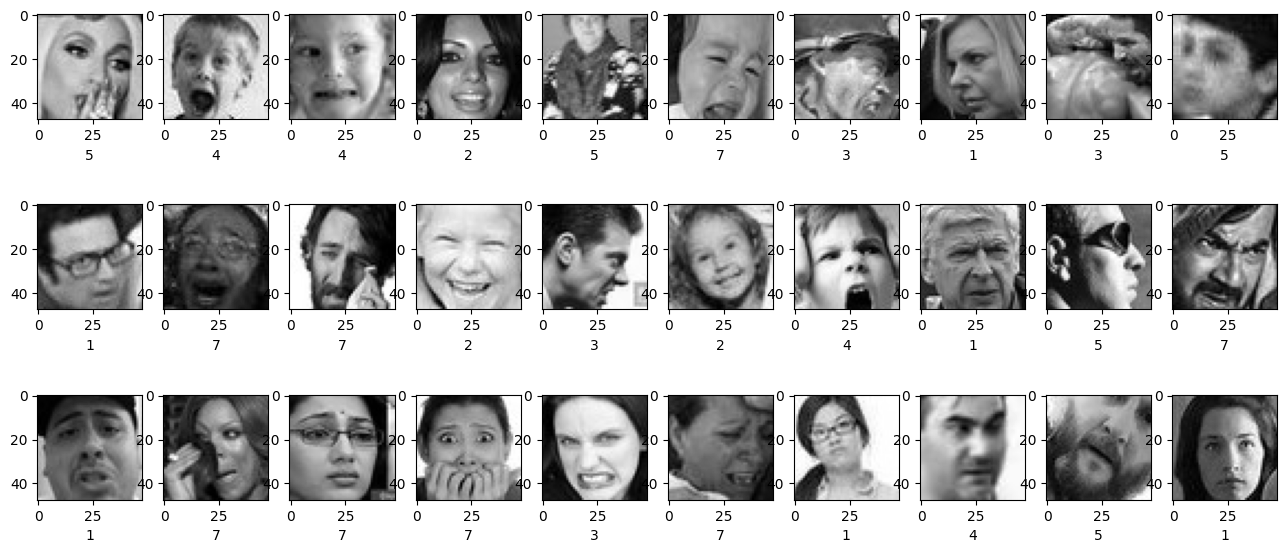

In [13]:
ran = datos.shape[0] - 1

fig, ax = plt.subplots(3, 10, figsize=(16, 7))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(ran), 1)
        img = np.array(XX.iloc[azar].values)
        img = np.array(img).reshape(48, 48)
        ax[k,j].imshow(img, cmap='gray')
        ax[k,j].set_xlabel(yy[azar[0]])
plt.show()
# 1 asco, 2: contento, 3 enfado, 4 miedo, 5 neutral, 6 sopresa, 7 triste

## Distribución de clases

In [14]:
# 1 asco, 2: contento, 3 enfado, 4 miedo, 5 neutral, 6 sopresa, 7 triste
datos.groupby('2304').size()

2304
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
dtype: int64

## Separación de datos para entrenamiento y test

In [15]:
X = datos.drop(['2304'], axis=1)
y = datos['2304']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

## Conversión de datos a matrices de 48x48 pixeles, del tipo float32 (requisito de keras)

In [17]:
X_train = np.array(X_train)
XX_train = np.empty(shape=(X_train.shape[0], 48, 48))

for k in range(X_train.shape[0]):
    XX_train[k] = X_train[k].reshape(48,48)

XX_train = XX_train.reshape(XX_train.shape[0], 48, 48, 1).astype('float32')
XX_train.shape

(4900, 48, 48, 1)

In [18]:
X_test = np.array(X_test)
XX_test = np.empty(shape=(X_test.shape[0], 48, 48))

for k in range(X_test.shape[0]):
    XX_test[k] = X_test[k].reshape(48,48)

XX_test = XX_test.reshape(XX_test.shape[0], 48, 48, 1).astype('float32')
XX_test.shape

(2100, 48, 48, 1)

## Conversión de salidas al tipo categórico (tipo one hot = uno caliente)

In [19]:
y_train.shape, y_test.shape,y.shape

((4900,), (2100,), (7000,))

In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y = to_categorical(y)

In [21]:
y_train.shape, y_test.shape, y.shape

((4900, 8), (2100, 8), (7000, 8))

# **Diseño de modelo CNN**

In [22]:
# Creacion de objeto CNN como un modelo secuencial
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(48, 48, 1), activation='relu'))

# Capa 2: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa 3: Convolucion de 64 filtros de 2x2, funcion de activacion RELU
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))

# Capa 4: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa 5: Convolucion de 128 filtros de 3x3, funcion de activacion RELU
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))

# Capa 6: MaxPoling 2x2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Capa 7: Aplanado de datos
cnn.add(Flatten())

# Capa 8: Red densa de 512 neuronas, funcion de activacion RELU
cnn.add(Dense(512, activation='relu'))

# Capa 9: Red densa de 256 neuronas, funcion de activacion RELU
cnn.add(Dense(256, activation='relu'))

# Capa 10: Red densa de 64 neuronas, funcion de activacion RELU
cnn.add(Dense(64, activation='relu'))

# 6 variedades de papa nativa
cnn.add(Dense(8, activation='softmax'))

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

## Compilación del modelo

In [25]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del modelo

In [26]:
cnn.fit(XX_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
154/154 [==============================] - 13s 7ms/step - loss: 1.9701 - accuracy: 0.1359
Epoch 2/200
154/154 [==============================] - 1s 5ms/step - loss: 1.9299 - accuracy: 0.1863
Epoch 3/200
154/154 [==============================] - 1s 5ms/step - loss: 1.8739 - accuracy: 0.2431
Epoch 4/200
154/154 [==============================] - 1s 5ms/step - loss: 1.8142 - accuracy: 0.2733
Epoch 5/200
154/154 [==============================] - 1s 5ms/step - loss: 1.7146 - accuracy: 0.3220
Epoch 6/200
154/154 [==============================] - 1s 7ms/step - loss: 1.5966 - accuracy: 0.3898
Epoch 7/200
154/154 [==============================] - 1s 6ms/step - loss: 1.4715 - accuracy: 0.4310
Epoch 8/200
154/154 [==============================] - 1s 7ms/step - loss: 1.3064 - accuracy: 0.5020
Epoch 9/200
154/154 [==============================] - 1s 6ms/step - loss: 1.1347 - accuracy: 0.5735
Epoch 10/200
154/154 [==============================] - 1s 5ms/step - loss: 0.8831 - accur

# **Testing**

## Evaluación del modelo

In [27]:
score = cnn.evaluate(XX_test, y_test)
print('Exactitud test: ', score[1])

66/66 [==============================] - 1s 6ms/step - loss: 5.5011 - accuracy: 0.3390
Exactitud test:  0.3390476107597351


In [30]:
# Predicciones de los datos de test
import sklearn.metrics as metrics
import numpy as np

y_pred = cnn.predict(XX_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

66/66 [==============================] - 0s 3ms/step


array([5, 1, 5, ..., 3, 6, 3])

In [43]:
from joblib import dump
dump(cnn, 'modelo_cnn_EXPRE_FAC.joblib')

['modelo_cnn_EXPRE_FAC.joblib']

In [44]:
from joblib import load
modelo_recuperado = load('modelo_cnn_EXPRE_FAC.joblib')


# **NUEVAS PREDICCIONES**

## Carga de librerías

In [31]:
import numpy as np
import sys
import os
import tensorflow as tf
from keras.models import load_model

## Nuevo dato

In [32]:
nuevo = np.array([0.118,0.116,0.206,0.191,0.07,0.136,0.156,0.13,0.28,0.146,0.048,0.01,0.056,0.041,0.045,0.033,0.046,0.012,0.004,0.031,0.064,0.065,0.045,0.033,0.045,0.073,0.027,0.032,0.106,0.137,0.203,0.257,0.334,0.309,0.426,0.417,0.463,0.435,0.4,0.364,0.372,0.306,0.257,0.203,0.215,0.414,0.816,0.893,0.196,0.127,0.202,0.195,0.054,0.128,0.183,0.15,0.237,0.119,0.048,0.033,0.068,0.041,0.054,0.07,0.046,0.023,0.012,0.027,0.037,0.03,0.021,0.025,0.029,0.045,0.043,0.104,0.067,0.086,0.246,0.211,0.273,0.375,0.445,0.409,0.431,0.431,0.455,0.407,0.395,0.306,0.253,0.195,0.231,0.391,0.78,0.883,0.228,0.104,0.174,0.191,0.05,0.11,0.191,0.169,0.158,0.064,0.037,0.06,0.086,0.054,0.062,0.074,0.022,0.015,0.012,0.014,0.009,0.008,0.018,0.037,0.034,0.088,0.094,0.17,0.055,0.047,0.289,0.266,0.199,0.426,0.449,0.413,0.4,0.384,0.455,0.439,0.36,0.313,0.3,0.226,0.247,0.32,0.689,0.899,0.218,0.092,0.174,0.21,0.093,0.099,0.158,0.17,0.159,0.078,0.046,0.059,0.062,0.051,0.051,0.039,0.006,0.011,0.012,0.01,0.003,0.008,0.03,0.054,0.096,0.13,0.037,0.092,0.082,0.098,0.257,0.266,0.246,0.426,0.379,0.374,0.369,0.341,0.388,0.423,0.327,0.344,0.351,0.255,0.278,0.261,0.576,0.895,0.245,0.131,0.199,0.238,0.152,0.083,0.095,0.15,0.241,0.176,0.125,0.078,0.019,0.023,0.035,0.015,0.017,0.025,0.023,0.017,0.006,0.013,0.034,0.05,0.071,0.091,0.01,0.033,0.055,0.097,0.17,0.239,0.352,0.407,0.308,0.304,0.337,0.349,0.345,0.407,0.343,0.372,0.359,0.251,0.293,0.257,0.505,0.875,0.284,0.151,0.191,0.222,0.168,0.067,0.052,0.118,0.232,0.22,0.199,0.141,0.035,0.035,0.051,0.023,0.029,0.036,0.035,0.019,0.017,0.033,0.048,0.056,0.009,0.029,0.074,0.102,0.044,0.105,0.16,0.251,0.324,0.367,0.335,0.315,0.31,0.333,0.336,0.423,0.343,0.36,0.367,0.262,0.258,0.256,0.489,0.85,0.352,0.152,0.167,0.206,0.168,0.076,0.061,0.092,0.145,0.153,0.169,0.158,0.057,0.073,0.082,0.051,0.044,0.056,0.052,0.027,0.021,0.037,0.052,0.056,0.045,0.014,0.072,0.137,0.09,0.17,0.168,0.191,0.214,0.288,0.347,0.349,0.274,0.258,0.332,0.458,0.355,0.332,0.397,0.313,0.207,0.247,0.446,0.709,0.436,0.171,0.175,0.223,0.182,0.104,0.092,0.081,0.098,0.075,0.083,0.106,0.044,0.085,0.104,0.077,0.075,0.083,0.072,0.031,0.012,0.025,0.037,0.041,0.06,0.039,0.055,0.118,0.086,0.135,0.102,0.117,0.177,0.216,0.284,0.321,0.235,0.195,0.336,0.481,0.409,0.317,0.411,0.364,0.191,0.247,0.382,0.501,0.614,0.238,0.18,0.238,0.174,0.151,0.106,0.071,0.055,0.036,0.032,0.034,0.04,0.06,0.064,0.042,0.053,0.071,0.048,0.021,0.012,0.008,0.027,0.086,0.074,0.087,0.095,0.091,0.085,0.078,0.074,0.07,0.153,0.212,0.29,0.314,0.27,0.246,0.321,0.43,0.432,0.347,0.388,0.391,0.313,0.266,0.343,0.386,0.783,0.383,0.172,0.219,0.201,0.194,0.116,0.081,0.072,0.045,0.04,0.047,0.044,0.04,0.048,0.048,0.061,0.065,0.048,0.029,0.036,0.031,0.039,0.074,0.083,0.099,0.079,0.098,0.158,0.129,0.101,0.15,0.192,0.204,0.251,0.317,0.372,0.395,0.413,0.425,0.466,0.413,0.379,0.379,0.302,0.239,0.303,0.272,0.881,0.563,0.201,0.18,0.217,0.214,0.1,0.083,0.106,0.064,0.056,0.076,0.055,0.029,0.036,0.055,0.05,0.057,0.05,0.048,0.056,0.048,0.044,0.064,0.06,0.093,0.087,0.093,0.16,0.215,0.209,0.207,0.207,0.231,0.27,0.335,0.411,0.462,0.464,0.437,0.391,0.405,0.415,0.446,0.321,0.242,0.302,0.221,0.893,0.729,0.283,0.109,0.229,0.241,0.105,0.097,0.134,0.079,0.071,0.099,0.078,0.036,0.032,0.055,0.04,0.046,0.057,0.069,0.074,0.064,0.052,0.054,0.05,0.053,0.106,0.121,0.133,0.25,0.305,0.215,0.145,0.2,0.25,0.304,0.381,0.476,0.519,0.511,0.362,0.338,0.403,0.41,0.301,0.295,0.36,0.397,0.899,0.874,0.432,0.074,0.244,0.288,0.132,0.091,0.149,0.114,0.118,0.149,0.138,0.096,0.067,0.059,0.052,0.04,0.042,0.069,0.081,0.081,0.062,0.042,0.057,0.032,0.094,0.138,0.129,0.189,0.242,0.184,0.133,0.156,0.176,0.233,0.358,0.491,0.531,0.499,0.362,0.315,0.356,0.275,0.305,0.342,0.321,0.562,0.852,0.93,0.656,0.178,0.241,0.295,0.128,0.07,0.171,0.179,0.208,0.232,0.234,0.209,0.167,0.112,0.075,0.032,0.011,0.034,0.061,0.078,0.07,0.038,0.024,0.047,0.07,0.072,0.086,0.115,0.133,0.125,0.173,0.152,0.144,0.209,0.354,0.483,0.499,0.448,0.366,0.381,0.364,0.172,0.301,0.295,0.202,0.578,0.825,0.918,0.848,0.351,0.21,0.289,0.148,0.085,0.167,0.214,0.258,0.259,0.265,0.283,0.245,0.167,0.103,0.052,0.025,0.022,0.022,0.054,0.093,0.098,0.024,0.051,0.045,0.022,0.043,0.103,0.156,0.176,0.216,0.196,0.191,0.256,0.377,0.479,0.499,0.467,0.444,0.499,0.43,0.192,0.285,0.24,0.233,0.529,0.89,0.903,0.923,0.445,0.183,0.32,0.204,0.14,0.126,0.2,0.245,0.222,0.226,0.277,0.264,0.182,0.13,0.095,0.071,0.038,0.003,0.034,0.123,0.177,0.098,0.024,0.026,0.058,0.056,0.13,0.262,0.321,0.322,0.29,0.277,0.327,0.413,0.479,0.487,0.471,0.503,0.55,0.511,0.329,0.364,0.299,0.358,0.419,0.925,0.852,0.989,0.509,0.24,0.33,0.236,0.169,0.134,0.162,0.228,0.244,0.187,0.151,0.157,0.154,0.121,0.089,0.08,0.068,0.091,0.03,0.072,0.238,0.182,0.035,0.039,0.105,0.161,0.274,0.376,0.442,0.449,0.343,0.341,0.339,0.377,0.4,0.435,0.439,0.502,0.512,0.567,0.441,0.446,0.622,0.46,0.351,0.875,0.892,0.979,0.621,0.292,0.283,0.237,0.142,0.114,0.183,0.214,0.186,0.132,0.08,0.069,0.098,0.095,0.068,0.104,0.173,0.26,0.189,0.152,0.234,0.241,0.146,0.114,0.12,0.19,0.302,0.36,0.395,0.472,0.343,0.314,0.316,0.341,0.385,0.439,0.47,0.483,0.534,0.532,0.523,0.524,0.587,0.526,0.414,0.88,0.89,0.916,0.798,0.402,0.244,0.256,0.169,0.101,0.191,0.191,0.146,0.139,0.089,0.072,0.139,0.13,0.102,0.114,0.157,0.288,0.301,0.281,0.311,0.242,0.191,0.144,0.123,0.175,0.257,0.304,0.358,0.402,0.323,0.311,0.328,0.342,0.428,0.475,0.49,0.534,0.498,0.458,0.567,0.571,0.493,0.5,0.547,0.91,0.88,0.867,0.904,0.459,0.26,0.326,0.228,0.12,0.191,0.198,0.171,0.149,0.103,0.101,0.183,0.185,0.185,0.146,0.08,0.172,0.268,0.315,0.33,0.277,0.179,0.132,0.17,0.217,0.24,0.263,0.3,0.324,0.311,0.308,0.314,0.33,0.463,0.49,0.462,0.454,0.475,0.533,0.549,0.498,0.4,0.413,0.637,0.89,0.888,0.896,0.906,0.432,0.281,0.366,0.251,0.122,0.159,0.225,0.261,0.214,0.13,0.103,0.117,0.178,0.195,0.176,0.074,0.103,0.166,0.203,0.207,0.262,0.183,0.194,0.256,0.226,0.199,0.252,0.288,0.305,0.265,0.217,0.217,0.274,0.428,0.447,0.427,0.447,0.434,0.55,0.608,0.561,0.376,0.376,0.743,0.873,0.88,0.919,0.902,0.479,0.287,0.307,0.26,0.144,0.085,0.117,0.181,0.181,0.173,0.161,0.117,0.135,0.117,0.121,0.07,0.076,0.064,0.077,0.105,0.214,0.167,0.191,0.23,0.181,0.193,0.286,0.293,0.22,0.153,0.113,0.163,0.28,0.376,0.377,0.408,0.488,0.391,0.466,0.634,0.587,0.34,0.476,0.901,0.876,0.868,0.887,0.914,0.674,0.385,0.248,0.236,0.191,0.102,0.057,0.057,0.061,0.116,0.162,0.144,0.081,0.046,0.066,0.052,0.055,0.016,0.027,0.076,0.178,0.115,0.068,0.115,0.162,0.209,0.236,0.17,0.095,0.107,0.158,0.254,0.375,0.347,0.305,0.367,0.38,0.415,0.539,0.596,0.486,0.419,0.701,0.946,0.88,0.89,0.858,0.908,0.861,0.542,0.263,0.189,0.175,0.221,0.257,0.197,0.09,0.047,0.047,0.039,0.038,0.03,0.082,0.078,0.06,0.015,0.018,0.045,0.053,0.053,0.027,0.064,0.099,0.072,0.053,0.008,0.042,0.16,0.303,0.373,0.443,0.327,0.245,0.31,0.38,0.427,0.615,0.646,0.572,0.666,0.887,0.895,0.886,0.878,0.901,0.892,0.896,0.634,0.306,0.193,0.148,0.166,0.245,0.351,0.29,0.159,0.108,0.053,0.036,0.011,0.104,0.197,0.168,0.078,0.074,0.021,0.028,0.055,0.026,0.018,0.017,0.032,0.086,0.08,0.153,0.295,0.294,0.24,0.299,0.324,0.3,0.335,0.337,0.482,0.612,0.629,0.786,0.903,0.896,0.849,0.862,0.884,0.9,0.858,0.911,0.677,0.336,0.222,0.199,0.127,0.088,0.153,0.201,0.202,0.194,0.136,0.042,0.013,0.04,0.146,0.283,0.237,0.166,0.166,0.17,0.228,0.147,0.042,0.02,0.039,0.121,0.195,0.225,0.279,0.184,0.103,0.224,0.367,0.378,0.362,0.38,0.539,0.59,0.598,0.837,0.915,0.872,0.894,0.873,0.884,0.883,0.835,0.934,0.751,0.375,0.241,0.28,0.195,0.068,0.021,0.032,0.063,0.088,0.059,0.052,0.064,0.055,0.079,0.239,0.307,0.338,0.399,0.418,0.399,0.185,0.027,0.041,0.039,0.03,0.069,0.068,0.087,0.043,0.069,0.26,0.434,0.429,0.358,0.425,0.574,0.587,0.594,0.863,0.89,0.851,0.906,0.864,0.858,0.865,0.851,0.934,0.834,0.449,0.284,0.308,0.286,0.202,0.101,0.041,0.026,0.049,0.067,0.124,0.093,0.063,0.032,0.052,0.155,0.391,0.492,0.504,0.406,0.183,0.075,0.134,0.127,0.058,0.058,0.082,0.074,0.105,0.216,0.363,0.454,0.45,0.408,0.464,0.562,0.586,0.634,0.863,0.859,0.859,0.875,0.892,0.898,0.893,0.888,0.903,0.909,0.551,0.307,0.325,0.323,0.302,0.249,0.201,0.174,0.166,0.19,0.192,0.078,0.009,0.06,0.046,0.07,0.359,0.496,0.449,0.37,0.296,0.275,0.287,0.26,0.229,0.26,0.262,0.248,0.303,0.402,0.446,0.461,0.467,0.459,0.47,0.549,0.549,0.649,0.888,0.874,0.871,0.867,0.849,0.849,0.805,0.802,0.841,0.946,0.679,0.386,0.368,0.349,0.353,0.327,0.298,0.287,0.271,0.286,0.278,0.207,0.099,0.158,0.222,0.199,0.379,0.502,0.498,0.444,0.453,0.465,0.448,0.423,0.389,0.382,0.385,0.384,0.433,0.469,0.471,0.479,0.482,0.451,0.434,0.521,0.478,0.652,0.928,0.894,0.863,0.891,0.454,0.455,0.402,0.4,0.488,0.609,0.553,0.418,0.392,0.364,0.391,0.376,0.347,0.369,0.378,0.391,0.399,0.348,0.224,0.182,0.289,0.306,0.382,0.498,0.567,0.52,0.491,0.434,0.44,0.499,0.482,0.444,0.504,0.488,0.477,0.451,0.439,0.476,0.48,0.437,0.405,0.466,0.458,0.729,0.935,0.872,0.859,0.906,0.154,0.181,0.148,0.114,0.153,0.189,0.33,0.437,0.396,0.368,0.407,0.395,0.38,0.431,0.444,0.434,0.417,0.275,0.153,0.079,0.216,0.315,0.387,0.539,0.555,0.543,0.442,0.256,0.237,0.385,0.46,0.477,0.507,0.485,0.473,0.463,0.465,0.48,0.463,0.409,0.4,0.418,0.49,0.843,0.923,0.833,0.879,0.91,0.214,0.145,0.175,0.111,0.134,0.08,0.142,0.357,0.433,0.356,0.389,0.397,0.401,0.414,0.402,0.485,0.389,0.249,0.101,0.053,0.171,0.368,0.414,0.535,0.548,0.532,0.477,0.355,0.179,0.23,0.368,0.464,0.473,0.471,0.471,0.455,0.442,0.45,0.435,0.391,0.377,0.339,0.585,0.894,0.91,0.837,0.874,0.899,0.265,0.18,0.132,0.154,0.115,0.068,0.044,0.22,0.398,0.34,0.354,0.402,0.39,0.372,0.416,0.453,0.339,0.167,0.183,0.173,0.177,0.341,0.449,0.437,0.56,0.548,0.528,0.492,0.344,0.231,0.287,0.417,0.479,0.456,0.464,0.445,0.395,0.393,0.431,0.35,0.346,0.32,0.687,0.941,0.871,0.899,0.835,0.859,0.35,0.233,0.089,0.114,0.087,0.06,0.003,0.068,0.232,0.306,0.34,0.397,0.388,0.381,0.41,0.332,0.19,0.167,0.281,0.257,0.236,0.302,0.428,0.481,0.498,0.533,0.498,0.47,0.416,0.285,0.271,0.306,0.377,0.419,0.419,0.383,0.387,0.351,0.369,0.335,0.339,0.353,0.778,0.967,0.879,0.915,0.858,0.875,0.362,0.272,0.13,0.058,0.083,0.032,0.03,0.006,0.11,0.237,0.266,0.286,0.309,0.32,0.321,0.235,0.115,0.221,0.272,0.227,0.274,0.344,0.416,0.469,0.445,0.491,0.432,0.363,0.379,0.338,0.342,0.281,0.302,0.349,0.386,0.339,0.359,0.336,0.326,0.323,0.314,0.518,0.872,0.931,0.895,0.846,0.892,0.875,0.317,0.287,0.187,0.06,0.09,0.003,0.038,0.011,0.045,0.128,0.167,0.186,0.253,0.233,0.151,0.155,0.162,0.241,0.286,0.279,0.246,0.346,0.426,0.406,0.475,0.466,0.428,0.389,0.399,0.381,0.403,0.356,0.297,0.254,0.365,0.345,0.314,0.347,0.348,0.319,0.371,0.742,0.962,0.904,0.914,0.866,0.911,0.894,0.333,0.299,0.173,0.07,0.092,0.004,0.004,0.015,0.005,0.064,0.13,0.134,0.23,0.236,0.099,0.114,0.177,0.158,0.195,0.328,0.279,0.269,0.348,0.394,0.42,0.392,0.396,0.398,0.419,0.395,0.333,0.249,0.201,0.197,0.275,0.307,0.35,0.399,0.353,0.382,0.535,0.772,0.852,0.822,0.871,0.916,0.876,0.935,0.372,0.347,0.2,0.09,0.125,0.046,0.003,0.009,0.019,0.05,0.105,0.076,0.162,0.248,0.154,0.13,0.142,0.052,0.007,0.221,0.374,0.318,0.323,0.376,0.346,0.357,0.385,0.399,0.433,0.386,0.164,0.045,0.137,0.223,0.128,0.188,0.361,0.403,0.345,0.476,0.584,0.628,0.64,0.633,0.655,0.76,0.742,0.794,0.353,0.402,0.323,0.152,0.183,0.081,0.015,0.021,0.029,0.008,0.07,0.098,0.152,0.213,0.142,0.085,0.106,0.07,0.009,0.156,0.405,0.444,0.461,0.408,0.41,0.455,0.5,0.521,0.521,0.403,0.091,0.023,0.222,0.272,0.046,0.105,0.28,0.339,0.369,0.518,0.514,0.562,0.597,0.502,0.42,0.528,0.62,0.561,0.358,0.403,0.361,0.286,0.26,0.11,0.038,0.011,0.019,0.003,0.017,0.05,0.101,0.153,0.117,0.066,0.085,0.097,0.017,0.053,0.252,0.401,0.489,0.556,0.535,0.633,0.59,0.439,0.505,0.331,0.056,0.131,0.328,0.304,0.122,0.06,0.229,0.296,0.421,0.422,0.246,0.501,0.61,0.564,0.389,0.373,0.599,0.48,0.347,0.403,0.401,0.325,0.246,0.125,0.055,0.031,0.027,0.003,0.004,0.019,0.066,0.129,0.128,0.111,0.093,0.105,0.028,0.006,0.136,0.331,0.416,0.376,0.352,0.51,0.436,0.46,0.45,0.181,0.139,0.259,0.324,0.296,0.171,0.118,0.229,0.328,0.472,0.262,0.063,0.325,0.584,0.592,0.448,0.249,0.525,0.677,0.344,0.396,0.442,0.364,0.241,0.202,0.102,0.053,0.059,0.01,0.002,0.003,0.027,0.081,0.107,0.116,0.121,0.101,0.079,0.062,0.074,0.211,0.375,0.399,0.354,0.471,0.451,0.393,0.286,0.17,0.226,0.398,0.344,0.32,0.256,0.223,0.244,0.382,0.59,0.164,0.008,0.104,0.485,0.622,0.555,0.317,0.297,0.618,0.339,0.403,0.456,0.364,0.251,0.295,0.159,0.063,0.086,0.029,0.01,0.001,0.002,0.038,0.065,0.095,0.112,0.097,0.129,0.15,0.076,0.084,0.229,0.314,0.345,0.323,0.323,0.215,0.184,0.328,0.339,0.418,0.355,0.323,0.302,0.305,0.305,0.437,0.673,0.167,0.013,0.022,0.262,0.59,0.641,0.499,0.185,0.315,0.325,0.419,0.443,0.325,0.25,0.348,0.168,0.059,0.117,0.039,0.008,0.001,0.001,0.024,0.047,0.077,0.091,0.118,0.153,0.185,0.177,0.175,0.203,0.186,0.241,0.235,0.223,0.266,0.287,0.392,0.44,0.41,0.343,0.328,0.306,0.349,0.36,0.444,0.667,0.287,0.005,0.025,0.041,0.428,0.639,0.559,0.39,0.19,0.326,0.451,0.416,0.266,0.258,0.344,0.136,0.058,0.181,0.068,0.008,0,0.004,0.02,0.028,0.059,0.098,0.113,0.111,0.162,0.238,0.29,0.311,0.281,0.266,0.312,0.333,0.408,0.406,0.4,0.424,0.363,0.369,0.384,0.345,0.36,0.366,0.409,0.644,0.546,0.079,0.001,0.001,0.197,0.54,0.568,0.601,0.334,0.37,0.488,0.369,0.223,0.305,0.342,0.101,0.065,0.254,0.103,0.015,0.004,0.02,0.024,0.012,0.028,0.08,0.074,0.087,0.143,0.179,0.221,0.304,0.327,0.321,0.321,0.348,0.353,0.404,0.42,0.372,0.345,0.403,0.398,0.316,0.312,0.356,0.423,0.621,0.719,0.351,0.05,0.035,0.053,0.374,0.564,0.589,0.514,0.421,0.516,0.326,0.199,0.36,0.361,0.091,0.076,0.281,0.115,0.019,0.016,0.039,0.039,0.012,0.016,0.023,0.064,0.156,0.217,0.187,0.198,0.276,0.28,0.304,0.329,0.348,0.336,0.38,0.349,0.384,0.471,0.402,0.329,0.195,0.225,0.376,0.493,0.582,0.688,0.622,0.206,0.019,0.039,0.229,0.505,0.506,0.612])
_nuevo = nuevo.reshape(48,48)

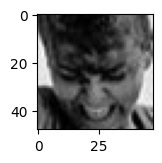

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5))
plt.imshow(_nuevo, cmap='gray')
plt.show()

In [34]:
# Funcion que predice
def Prediccion(nuevo):
  XX_nuevo = nuevo.reshape(48, 48)
  XX_nuevo = XX_nuevo.reshape(1, 48, 48, 1).astype('float32')
  # Prediccion de la imagen
  arreglo = cnn.predict(XX_nuevo)

  dic = {1: 'asco', 2: 'contento', 3:'enfado', 4: 'miedo', 5: 'neutral', 6: 'sorpresa', 7: 'triste'}

  resultado = arreglo[0]
  respuesta = np.argmax(resultado)
  print(dic[respuesta])

## Predicción

In [36]:
Prediccion(nuevo)

1/1 [==============================] - 0s 26ms/step
neutral


# **TAREA**


```
Hacer las adecuaciones necesaria del presente código, para clasificar las 20 variedades de papa nativa.
Tambien...
Grabar el mejor modelo encontrado
Mostrar la matriz de confusión
```



In [ ]:
from os import listdir
from os.path import isfile
import cv2

# Funcion para enlistar los archivos de una carpeta
def ArchivoDir(path):
    return [obj for obj in listdir(path) if isfile(path + obj)]

# Ruta inicial de fotografias
Ruta = './fotos/'
files = ArchivoDir(Ruta)

# Array para almacenar datos vectorizados
pixel = []
# Repeticion por cada archivo de imagen
for file in files:
    # Convierte imagen en escala de grices
    image = cv2.imread(Ruta + file, cv2.IMREAD_GRAYSCALE)
    # Reescala la imagen a una dimension de 48x48 pixeles
    image_rescaled = cv2.resize(image, (48,48), interpolation=cv2.INTER_AREA)
    try:
        # Obtienen imagen vectorizado y etiquetado
        img = np.reshape(image_rescaled, (2304))
        #img = np.append(img,dir)
        pixel.append(img)
    except:
        # Mostrar error de imagenes que no pudieron ser procesados
        print('Error -> ' + Ruta + file)

# Convierte array de imagenes a dataframe de pandas
df = pd.DataFrame(pixel)

# Grabar archivo en formato csv
df.to_csv('./fotos.csv', index=False, sep=',')

## **Cargar datos**

In [41]:
# Dataset de nuevas imagenes
nuevos_datos = pd.read_csv('/content/drive/My Drive/fotos.csv', sep=',')
nuevos_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,171,143,171,157,162,165,148,166,161,149,...,79,74,78,73,78,81,75,81,67,74
1,72,75,95,191,213,185,195,184,126,116,...,63,60,61,60,59,101,118,125,139,147
2,156,156,165,162,165,144,141,140,144,167,...,70,88,99,110,106,93,89,102,118,106
3,235,236,234,233,224,219,219,221,216,184,...,49,52,58,68,132,159,212,223,224,225
4,53,51,50,48,44,47,47,45,43,42,...,184,182,181,179,175,123,52,47,44,49


## **Normalizar datos**

In [47]:
# Transformación por amplitud [0..1]
def Normalizacion_Amplitud(atributo):
    return (atributo - atributo.min()) / (atributo.max() - atributo.min())

# Normaliza todos los atributos del dataframe
def NormalizarTodo(datos):
    for col in datos.columns:
        datos[col] = Normalizacion_Amplitud(datos[col])
    return datos

In [48]:
nuevos_datos = NormalizarTodo(nuevos_datos)
nuevos_datos.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.678392,0.520619,0.657609,0.589189,0.661202,0.711230,0.612022,0.699454,0.696133,0.641304,...,0.147059,0.109453,0.102564,0.067358,0.097938,0.065217,0.114428,0.165049,0.169643,0.292490
1,0.180905,0.170103,0.244565,0.772973,0.939891,0.818182,0.868852,0.797814,0.502762,0.461957,...,0.068627,0.039801,0.015385,0.000000,0.000000,0.173913,0.328358,0.378641,0.491071,0.581028
2,0.603015,0.587629,0.625000,0.616216,0.677596,0.598930,0.573770,0.557377,0.602210,0.739130,...,0.102941,0.179104,0.210256,0.259067,0.242268,0.130435,0.184080,0.266990,0.397321,0.418972
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.831522,...,0.000000,0.000000,0.000000,0.041451,0.376289,0.489130,0.796020,0.854369,0.870536,0.889328
4,0.085427,0.046392,0.000000,0.000000,0.016393,0.080214,0.060109,0.038251,0.044199,0.059783,...,0.661765,0.646766,0.630769,0.616580,0.597938,0.293478,0.000000,0.000000,0.066964,0.193676


1/1 [==============================] - 0s 37ms/step
neutral
1/1 [==============================] - 0s 48ms/step
enfado
1/1 [==============================] - 0s 40ms/step
contento
1/1 [==============================] - 0s 37ms/step
sorpresa
1/1 [==============================] - 0s 31ms/step
triste
1/1 [==============================] - 0s 75ms/step
enfado
1/1 [==============================] - 0s 48ms/step
sorpresa
1/1 [==============================] - 0s 33ms/step
contento


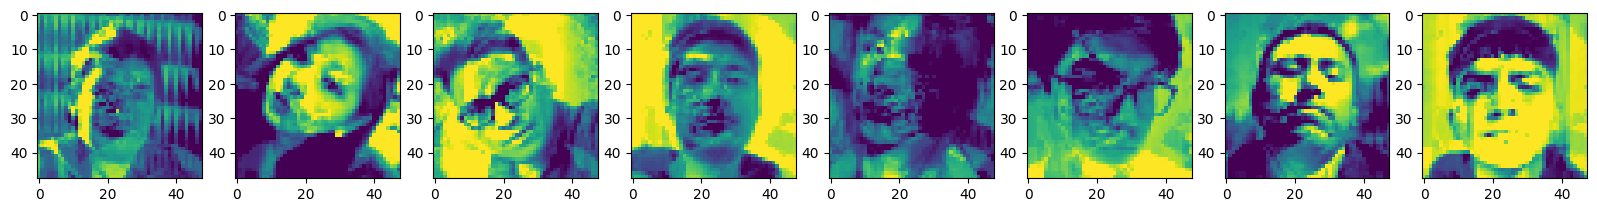

In [60]:
prediccion = []

fig, ax = plt.subplots(1, 8, figsize=(20,20))

for i in range(len(nuevos_datos.index)):
    n_foto = (np.array(nuevos_datos.loc[i]))
    _n_foto = n_foto.reshape(48, 48)
    ax[i].imshow(_n_foto)
    Prediccion(n_foto)

plt.show()